Building naive bayes classifier using numpy and pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
training_data = pd.read_csv('/content/drive/MyDrive/DM Assignment 2/DataMining Aiignment 2/train_data.csv')
testing_data = pd.read_csv('/content/drive/MyDrive/DM Assignment 2/DataMining Aiignment 2/test_data.csv')

In [10]:
training_data.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


In [11]:
testing_data.head()

,Unnamed: 0,Sentence_id,New_Sentence
0,0,UAERES16346,Collaborate across all of DB&T practices and o...
1,1,COGREQ15586,Strong technology expertise in Identity and A...
2,2,UAEREQ12722,Strong knowledge on Service Virtualization.
3,3,COGSKL29155,Architect scalable data processing and analyti...
4,4,PHERES12551,"Map client organization, build outstanding rel..."


In [8]:
training_data.columns

Index(['Unnamed: 0', 'Sentence_id', 'New_Sentence', 'Type'], dtype='object')

In [9]:
testing_data.columns

Index(['Unnamed: 0', 'Sentence_id', 'New_Sentence'], dtype='object')

In [18]:
training_data.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


In [19]:
testing_data.head()

,Unnamed: 0,Sentence_id,New_Sentence
0,0,UAERES16346,Collaborate across all of DB&T practices and o...
1,1,COGREQ15586,Strong technology expertise in Identity and A...
2,2,UAEREQ12722,Strong knowledge on Service Virtualization.
3,3,COGSKL29155,Architect scalable data processing and analyti...
4,4,PHERES12551,"Map client organization, build outstanding rel..."


We need to classify the testing Data based on the training data

Our aim is to build the NBC with out using libraries

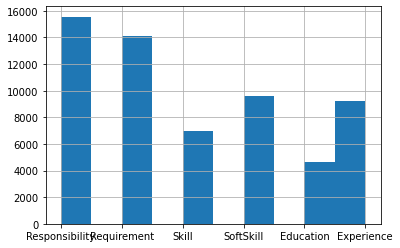

In [20]:
training_data['Type'].hist()

The Type is our target variable and we see how it is distributed

All variables must me independent in Naive Bayes Classfier

In [21]:
training_data.corr()

,Unnamed: 0
Unnamed: 0,1.0


No variables are Related to Each other as we can see in the matrix

Based on the Bayes theorm we individually write funtions for calculating each propability

P(A/B) = P(B/A).P(A)/P(B) The Math behind Naive Bayes we write the individual functions for calculating each of them 

# FOR P(A)

In [24]:
def prob_of_a(df, A):
    classes = sorted(list(df[A].unique()))
    probofa = []
    for i in classes:
        probofa.append(len(df[df[Y]==i])/len(df))
    return probofa

# Fo calculating P(B/A) for any given value of A and **B**